In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score


In [18]:
df_train = pd.read_csv('/kaggle/input/playground-series-s3e13/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s3e13/test.csv')
df = pd.concat([df_train])

In [19]:
df['target'] = df['prognosis'].astype('category').cat.codes

In [20]:
df = df.drop(['id'], axis=1)

In [21]:
df

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis,target
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease,3
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis,7
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease,3
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika,10
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Plague,5
703,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malaria,4
704,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika,10
705,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Plague,5


In [22]:
train_features = df.columns[:-2]
train_target = ['target']

In [23]:
X = df[train_features]
y = df[train_target]

In [24]:
similar_columns = ['loss_of_appetite', 'urination_loss', 'slow_heart_rate', 'abdominal_pain', 'light_sensitivity', 'yellow_skin', 'yellow_eyes']
X['similar_cluster'] = X[similar_columns].sum(axis=1)

lyme_columns = ['jaundice', 'weight_loss', 'weakness', 'back_pain', 'sudden_fever', 'myalgia', 'chills', 'orbital_pain', 'digestion_trouble']
X['lyme_cluster'] = X[lyme_columns].sum(axis=1)

tungiasis_columns = ['ulcers', 'toenail_loss', 'itchiness']
X['tungiasis_cluster'] = X[tungiasis_columns].sum(axis=1)

chikungunya_columns = ['convulsion', 'finger_inflammation', 'speech_problem', 'toenail_loss', 'ulcers', 'itchiness', 'lips_irritation', 'breathing_restriction', 'toe_inflammation', 'paralysis', 'stomach_pain', 'confusion', 'irritability', 'bullseye_rash']
X['chikungunya_cluster'] = X[chikungunya_columns].sum(axis=1)

columns = [col for col in X if col != 'prognosis']
X[columns] = X[columns].astype(int)

/tmp/ipykernel_24/631674942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['similar_cluster'] = X[similar_columns].sum(axis=1)


In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
y_train = np.array(y_train).ravel()
y_val = np.array(y_val).ravel()

In [28]:
import numpy as np

def mapk(y_true, y_pred, k=3):
    def apk(actual, predicted, k):
        if len(predicted) > k:
            predicted = predicted[:k]
        
        score = 0.0
        num_hits = 0.0
        
        for i, p in enumerate(predicted):
            if p in actual and p not in predicted[:i]:
                num_hits += 1.0
                score += num_hits / (i + 1.0)
        
        return score / min(len(actual), k)
    
    return np.mean([apk([a], p, k) for a, p in zip(y_true, y_pred)])


In [29]:
def prediction(X, X_val, y, y_val, model, k=3):
    model.fit(X, y)
    y_prob = model.predict_proba(X_val)
    y_pred_topk = np.argsort(y_prob, axis=1)[:, -k:][:, ::-1]
    score = mapk(y_val, y_pred_topk, k=k)
    return y_prob, score

In [35]:
def find_best_features(model, print_flag = False):
    metrics = []
    copy_features = X.columns
    best_features = []
    err_arr_tr = []
    err_arr_val = []
    for j in range(len(copy_features)):
        arr = []
        for idx, i in enumerate(copy_features):
            best_features_copy = best_features.copy()
            best_features_copy.append(i)
            X_cur_train = X_train[best_features_copy]
            
            _, map = prediction(X_cur_train, X_cur_train, y_train, y_train, model)
            
            arr.append(map)
        val_idx = np.argmax(arr)
        best_features.append(copy_features[val_idx])
        copy_features = np.delete(copy_features, val_idx)
        print(best_features)
        
        X_cur_train = X_train[best_features]
        X_cur_val = X_val[best_features]

        _, map_tr = prediction(X_cur_train, X_cur_train, y_train, y_train, model)
        _, map_val = prediction(X_cur_train, X_cur_val, y_train, y_val, model)
        
        err_arr_tr.append(map_tr)
        err_arr_val.append(map_val)


        clear_output(wait=True)
        plt.plot(err_arr_tr, label='Трэйновая выборка')
        plt.plot(err_arr_val, label = 'Валидационная выборка')
        plt.legend()
        plt.grid()
        plt.title(f'Значение метрик на двух выборках от числа фичей для модели {model}')
        plt.xlabel('Число фичей')
        plt.ylabel('MAP@K')
        plt.show()
    idx = np.argmax(err_arr_val) + 1
    best_features = best_features[:idx]
    return best_features

In [36]:
rf_model = RandomForestClassifier(random_state=42)

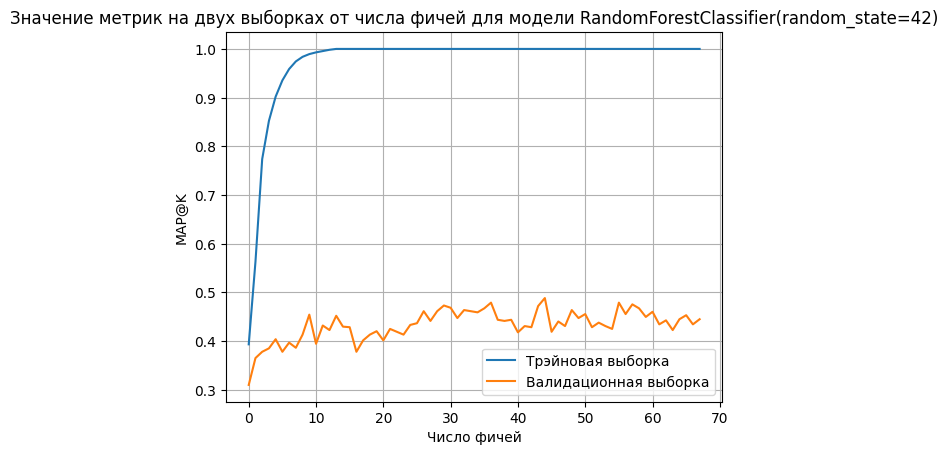

In [37]:
rf_features = find_best_features(rf_model)

In [54]:
X_cur_train = X_train[rf_features]
X_cur_val = X_val[rf_features]

In [41]:
import optuna
def objective(trial):
    params = {
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
    }
    model = RandomForestClassifier(random_state=42, **params)
    pred, score = prediction(X_cur_train, X_cur_val, y_train, y_val, model, k=3)
    return score

# Запуск оптимизации для базовых моделей
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=50, n_jobs=-1)

best_params_rf = study_rf.best_params
print("Best Parameters for RandomForest:", best_params_rf)

[I 2024-12-15 19:23:36,588] A new study created in memory with name: no-name-a473a6c0-bdb6-400e-aeb3-abb4952ac08a
[I 2024-12-15 19:23:40,149] Trial 2 finished with value: 0.43544600938967143 and parameters: {'min_samples_split': 10, 'min_samples_leaf': 19}. Best is trial 2 with value: 0.43544600938967143.
[I 2024-12-15 19:23:40,589] Trial 1 finished with value: 0.46713615023474175 and parameters: {'min_samples_split': 8, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.46713615023474175.
[I 2024-12-15 19:23:40,686] Trial 0 finished with value: 0.4647887323943662 and parameters: {'min_samples_split': 17, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.46713615023474175.
[I 2024-12-15 19:23:41,024] Trial 3 finished with value: 0.4483568075117371 and parameters: {'min_samples_split': 12, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.46713615023474175.
[I 2024-12-15 19:23:44,126] Trial 4 finished with value: 0.4471830985915493 and parameters: {'min_samples_split': 14, 'm

Best Parameters for RandomForest: {'min_samples_split': 6, 'min_samples_leaf': 11}


In [43]:
model = RandomForestClassifier(random_state=42, n_estimators=9000, **best_params_rf)

In [65]:
similar_columns = ['loss_of_appetite', 'urination_loss', 'slow_heart_rate', 'abdominal_pain', 'light_sensitivity', 'yellow_skin', 'yellow_eyes']
df_test['similar_cluster'] = df_test[similar_columns].sum(axis=1)

lyme_columns = ['jaundice', 'weight_loss', 'weakness', 'back_pain', 'sudden_fever', 'myalgia', 'chills', 'orbital_pain', 'digestion_trouble']
df_test['lyme_cluster'] = df_test[lyme_columns].sum(axis=1)

tungiasis_columns = ['ulcers', 'toenail_loss', 'itchiness']
df_test['tungiasis_cluster'] = df_test[tungiasis_columns].sum(axis=1)

chikungunya_columns = ['convulsion', 'finger_inflammation', 'speech_problem', 'toenail_loss', 'ulcers', 'itchiness', 'lips_irritation', 'breathing_restriction', 'toe_inflammation', 'paralysis', 'stomach_pain', 'confusion', 'irritability', 'bullseye_rash']
df_test['chikungunya_cluster'] = df_test[chikungunya_columns].sum(axis=1)

In [66]:
X_test = df_test[X_train.columns]

In [67]:
y_total = np.concatenate((y_train, y_val))

In [61]:
model.fit(pd.concat([X_train, X_val]), y_total)

RandomForestClassifier(min_samples_leaf=11, min_samples_split=6,
                       n_estimators=9000, random_state=42)

In [68]:
y_prob = model.predict_proba(X_test)
y_pred_topk = np.argsort(y_prob, axis=1)[:, -3:][:, ::-1]

In [69]:
y_pred_topk_categories = np.vectorize(lambda x:df['prognosis'].astype('category').cat.categories[x])(y_pred_topk)

In [70]:
import csv
dict = {'id': df_test['id'], 'prognosis':  [' '.join(pred) for pred in y_pred_topk_categories]}
pd.DataFrame(dict).to_csv('sample.csv', index=False, quoting=csv.QUOTE_NONE, escapechar=' ')